In [ ]:
# !pip install fastai

https://github.com/gveres/donateacry-corpus

Gender
m - male
f - female
Age
04 - 0 to 4 weeks old
48 - 4 to 8 weeks old
26 - 2 to 6 months old
72 - 7 month to 2 years old
22 - more than 2 years old
Reason
hu - hungry
bu - needs burping
bp - belly pain
dc - discomfort
ti - tired
lo - lonely
ch - cold/hot
sc - scared
dk - don't know

In [1]:
# !python -m pip install --upgrade pip

In [2]:
# import keras as tf
# print(tf.__version__)

In [13]:
import audioread
import librosa
import sounddevice as sd
import struct
import wave
import contextlib
from scipy.signal import spectrogram
import sys
import glob
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedShuffleSplit

In [14]:
filename = "/Users/MCA/Desktop/ANUJA B/data/datadonateacry-corpus-master/donateacry-ios-upload-bucket/090C15A8-5406-4EA5-97A3-81F6527227C0-1431333076-1.0-m-72-hu.caf"
file_ios = "/Users/MCA/Desktop/ANUJA B/data/donateacry-corpus-master/donateacry-ios-upload-bucket/" # .caf
file_android = "/Users/MCA/Desktop/ANUJA B/data/donateacry-corpus-master/donateacry-android-upload-bucket/" # .3gp
out_path = "/Users/MCA/Desktop/ANUJA B/wav/BabySounds/"

ios = glob.glob(file_ios + '/*.caf')
android = glob.glob(file_android + '/*.3gp')

filename.split('/')[-1]
print(file_ios)


/Users/MCA/Desktop/ANUJA B/data/donateacry-corpus-master/donateacry-ios-upload-bucket/


In [3]:
# !pip install wave

In [15]:
def wav_plotter(full_path, class_label):   
    rate, wav_sample = wav.read(full_path)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    print('sampling rate: ',rate,'Hz')
    print('bit depth: ',bit_depth)
    print('number of channels: ',wav_sample.shape)
    print('duration: ',wav_sample.shape[0]/rate,' second')
    print('number of samples: ',len(wav_sample))
    print('class: ',class_label)
    plt.figure(figsize=(12, 4))
    plt.plot(wav_sample) 
    return ipd.Audio(full_path)

sampling rate:  8000 Hz
bit depth:  16
number of channels:  (55680,)
duration:  6.96  second
number of samples:  55680
class:  hei


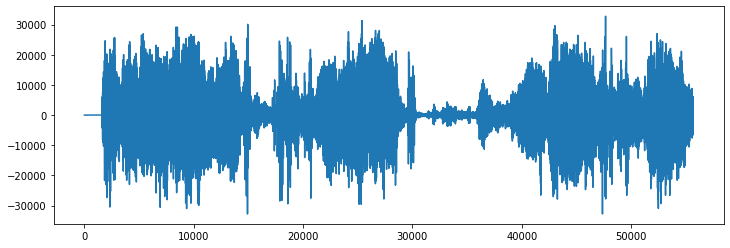

In [16]:
fn1 = out_path + '0f257dac-7d6f-4575-9192-e3b4dcd3d4ef-1430185476161-1.7-f-26-lo.3gp.wav'
wav_plotter(fn1,'hei')
# print(fn)

sampling rate:  16000 Hz
bit depth:  16
number of channels:  (112000,)
duration:  7.0  second
number of samples:  112000
class:  hei


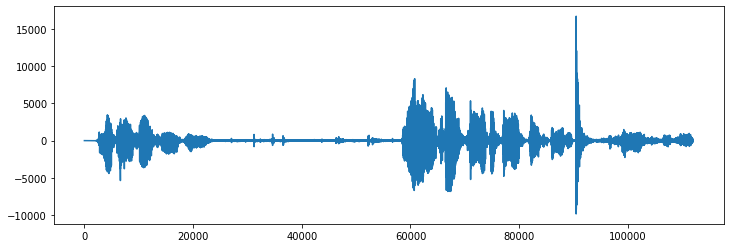

In [17]:
fn = out_path + '0FDFDED3-9171-4F10-92A5-3187AE205BFB-1436219426-1.1-m-04-hu.caf.wav'
wav_plotter(fn,'hei')

In [18]:
fs, wav_sample = wav.read(fn1)
f, t, Sxx = spectrogram(wav_sample, fs=fs)

E:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


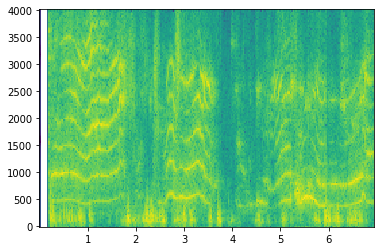

In [19]:
plt.pcolormesh(t, f, 10 * np.log10(Sxx),shading='auto')

In [20]:
fs, wav_sample = wav.read(fn)
f1, t1, Sxx = spectrogram(wav_sample, fs=fs)

E:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


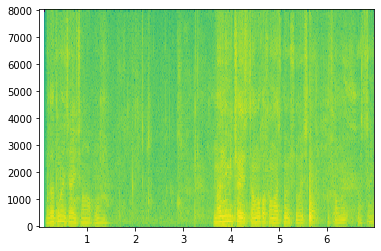

In [21]:
plt.pcolormesh(t1, f1, 10 * np.log10(Sxx),shading='auto')

In [22]:
sum(sum(abs(Sxx)))

6753618.422147492

## Resample and clean data:

In [23]:
import glob 
files = glob.glob(out_path + '*.wav')
files
file = files[1]
filetype = file[-7:-4]
file
reason = file[-10:-8]
age = file[-13:-11]
gender = file[-15:-14]
file


'/Users/MCA/Desktop/ANUJA B/wav/BabySounds\\01a592eb-513d-4431-b7ba-b0fba5a00908-1430339263195-1.7-m-04-hu.3gp.wav'

In [24]:
rate, wav_sample = wav.read(file)


In [25]:
wav_sample
wav_sample
rate

8000

In [26]:
sd.play(wav_sample[::2], 8000)

In [27]:
sd.play(wav_sample[1::2], 8000)
l = np.array([1,2,3,4,5,6])
l[::2]

array([1, 3, 5])

In [28]:
wav_sample = wav_sample.astype(float)
print(fs)

16000


In [29]:
f, t, Sxx = spectrogram(wav_sample, fs=fs)
S = librosa.feature.melspectrogram(y=wav_sample, sr=fs)

In [30]:
# print(S)

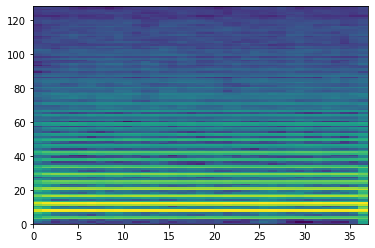

In [31]:
plt.pcolormesh( 10 * np.log10(S))

In [ ]:
# not use
#plt.pcolormesh(t, f, 10 * np.log10(Sxx))

In [ ]:
(10 * np.log10(S)).shape

In [32]:
S


array([[1.07544790e+08, 1.84987776e+08, 1.42226807e+08, ...,
        1.30050571e+08, 1.95372033e+08, 6.04085327e+09],
       [6.89419005e+08, 2.73571934e+08, 6.15547058e+07, ...,
        2.85563739e+07, 1.87196491e+08, 6.92097783e+09],
       [2.37651986e+09, 1.26603518e+09, 1.57139403e+08, ...,
        2.19629757e+08, 2.61599368e+08, 1.44021318e+10],
       ...,
       [1.00880626e+08, 1.26867566e+08, 1.25772396e+08, ...,
        9.32998042e+07, 9.57682077e+07, 1.10452809e+08],
       [7.54077098e+07, 6.99875810e+07, 1.00543630e+08, ...,
        8.33015158e+07, 9.12411563e+07, 1.12521248e+08],
       [9.76432837e+07, 1.23819885e+08, 1.13817050e+08, ...,
        6.99799368e+07, 7.91651157e+07, 1.26924498e+08]])

In [33]:
X = []
y = []
for f in files:
    rate, wav_sample = wav.read(f)
    wav_sample = wav_sample.astype(float)
    reason = f[-10:-8]
    if reason == 'hu':
        r = [1,0,0,0,0,0,0,0,0]
    elif reason == 'bu':
        r = [0,1,0,0,0,0,0,0,0]
    elif reason == 'bp':
        r = [0,0,1,0,0,0,0,0,0]
    elif reason == 'dc':
        r = [0,0,0,1,0,0,0,0,0]
    elif reason == 'ti':
        r = [0,0,0,0,1,0,0,0,0]        
    elif reason == 'lo':
        r = [0,0,0,0,0,1,0,0,0]
    elif reason == 'ch':
        r = [0,0,0,0,0,0,1,0,0]
    elif reason == 'sc':
        r = [0,0,0,0,0,0,0,1,0]
    elif reason == 'dk':
        r = [0,0,0,0,0,0,0,0,1]   
    
    if rate == 16000:
        wav_sample = wav_sample[:16000*5]
        #S1 = librosa.feature.melspectrogram(y=wav_sample[::2], sr=8000)
        f, t, S1 = spectrogram(wav_sample[::2], fs=8000)
        #tmp = (10 * np.log10(S1)).ravel()
        tmp=S1.ravel()
        tmp = tmp/max(abs(tmp))
        X.append(list(tmp)) 
        y.append(r)
        #S2 = librosa.feature.melspectrogram(y=wav_sample[1::2], sr=8000)
        f, t, S2 = spectrogram(wav_sample[1::2], fs=8000)
        #tmp = (10 * np.log10(S2)).ravel()
        tmp=S2.ravel()
        tmp = tmp/max(abs(tmp))
        X.append(list(tmp)) 
        y.append(r)
    elif rate == 8000:
        wav_sample = wav_sample[:8000*5]
        #S = librosa.feature.melspectrogram(y=wav_sample, sr=8000)
        f, t, S = spectrogram(wav_sample, fs=8000)        
        #tmp = (10 * np.log10(S)).ravel()
        tmp=S.ravel()

        tmp = tmp/max(abs(tmp))
        X.append(list(tmp))  
        y.append(r)
#         print(tmp)

E:\software\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1963: UserWarning: nperseg = 256 is greater than input length  = 32, using nperseg = 32
  .format(nperseg, input_length))
E:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
E:\software\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide


In [97]:
# display(Xn)

In [98]:
# display(Xn)

In [34]:
csv_path = '/Users/MCA/Desktop/ANUJA B/wav/ESC-50-master/meta/esc50.csv'
audio_path = '/Users/MCA/Desktop/ANUJA B/wav/ESC-50-master/audio/'
meta = pd.read_csv(csv_path)

In [35]:
meta = meta[meta.category != 'crying_baby']

In [36]:
 for f in meta.filename.values:
    rate, wav_sample = wav.read(audio_path+f)
    if len(wav_sample) >= rate*5:
        wav_sample = wav_sample[:rate*5]
    else:
        print(f)
    wav_sample = wav_sample.astype(float)
    y_8k = librosa.resample(wav_sample, rate, 8000)
    #S = librosa.feature.melspectrogram(y=y_8k, sr=8000)
    f, t, S = spectrogram(y_8k, fs=8000)
    #tmp = (10 * np.log10(S)).ravel()
    tmp = S.ravel()
    tmp = tmp/max(abs(tmp))
    tmp=[tmp]
    X.append(tmp) 
    y.append([0,0,0,0,0,0,0,0,0])

In [44]:
# X.shape
# y.shape 1 12 0

In [37]:
bad = []
for i in range(len(X)):
#     print(X[i])
    if len(X[i]) != 10112:
        bad.append(i)
        

In [40]:
import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Dense, Conv1D, GlobalAveragePooling1D
from keras.layers import Input
from keras import backend as K



Using TensorFlow backend.


In [48]:
# input_tensor = Input(shape=(128, 224, 1))  # this assumes K.image_data_format() == 'channels_last'

In [19]:
# print(X1)

In [41]:
# print(np.array(X).shape)

# X1=np.array(X,dtype=object)
# y1=np.array(y,dtype=object)
X1 = np.array(X)
y1 = np.array(y)
print(X1.shape)
print(y1.shape)
np.array(X).shape
# np.savetxt("X_scipy.csv", X, delimiter=",", fmt='%s')
# np.savetxt("y_scipy.csv", y, delimiter=",", fmt='%s')

(3504,)
(3504, 9)


(3504,)

In [100]:
# display(X1r)

In [48]:
# Simple model:
import tensorflow 
model = tensorflow.keras.Sequential()
# model.add(tensorflow.keras.layers.Conv1D(100, 10, activation='relu', input_shape=(10112,)))
# model.add(tensorflow.keras.layers.Conv1D(160, 10, activation='relu'))
# model.add(tensorflow.keras.layers.GlobalAveragePooling1D())

model.add(tensorflow.keras.layers.Dense(1000, activation='relu',input_shape=(10112,)))
model.add(tensorflow.keras.layers.Dense(100, activation='relu'))
model.add(tensorflow.keras.layers.Dense(9, activation='softmax'))

optimizer = tensorflow.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'],) # 'categorical_crossentropy'


In [49]:
# print(X1)
# y1.shape


np.array(X1).shape

(3504,)

In [50]:
# train the model on the new data for a few epochs
batch_size = 24
print(len(X1))
steps_per_epoch = int(len(X1)/batch_size)
print(steps_per_epoch )
model.fit(X1, y1, batch_size=batch_size, epochs=10)

3504
146


ValueError: Error when checking input: expected dense_6_input to have shape (10112,) but got array with shape (1,)

In [51]:
x_train, x_test, y_train, y_test = train_test_split(X1,y1, random_state=0, test_size=0.3)

In [52]:
x_trainr, x_testr, y_trainr, y_testr = train_test_split(Xr,yr, random_state=0, test_size=0.3)

NameError: name 'Xr' is not defined

In [53]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1,y1, random_state=0, test_size=0.3)
x_trainr, x_testr, y_trainr, y_testr = train_test_split(Xr,yr, random_state=0, test_size=0.5)


NameError: name 'Xr' is not defined

In [54]:
# train the model on the new data for a few epochs
batch_size = 24
steps_per_epoch = int(len(X1)/batch_size)

model.fit(x_train, y_train, batch_size=batch_size, epochs=10)

ValueError: Error when checking input: expected dense_6_input to have shape (10112,) but got array with shape (1,)

In [55]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

ValueError: Error when checking input: expected dense_6_input to have shape (10112,) but got array with shape (1,)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA


In [57]:
pca = PCA(n_components=32)  
x_train = pca.fit_transform(x_train)  
x_test = pca.transform(x_test)  
classifier = RandomForestClassifier(n_estimators=200)  
classifier.fit(x_train, y_train)

ValueError: setting an array element with a sequence.

In [58]:
np.mean([classifier.predict(x_test) == y_test])

NameError: name 'classifier' is not defined

In [ ]:
[[0,0,0,0,0,0,0,0,0]]*len(x_test)
accuracy =np.mean([[[0,0,0,0,0,0,0,0,0]]*len(x_test) == y_test])

In [70]:
accuracy = finish.history["acc"]
print(accuracy)

0.9498310097169412


In [63]:
from sklearn.externals import joblib
joblib.dump(classifier, 'my_model.pkl', compress=9)
joblib.dump(pca, 'my_model_pca.pkl', compress=9)

NameError: name 'classifier' is not defined